In [1]:
# Instalamos open cv en caso no se cuente con el
!pip install opencv-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Se importan las librerías que utilizaremos
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import numpy as np

## Identificacion de puntos y transformación

In [3]:
# Se importa la información de los caminantes
df = pd.read_csv('../Data/caminantes.csv',sep=';')
df.head()

,Number,Frame,headValid,bodyValid,headLeft,headTop,headRight,headBottom,bodyLeft,bodyTop,bodyRight,bodyBottom
0,0,2,1,1,"295,626","811,142","334,374","851,827","260,713","811,142","396,615","1121,977"
1,1,2,1,1,"901,68","402,431","927,32","430,35","877,443","402,431","957,062","624,178"
2,2,2,1,1,"1646,674","935,667","1691,326","982,208","1596,772","935,667","1729,112","1293,447"
3,3,2,1,1,"882,242","49,998","896,758","65,783","866,204","49,998","916,275","179,462"
4,4,2,1,1,"740,066","229,356","759,934","250,987","719,841","229,356","786,812","405,142"


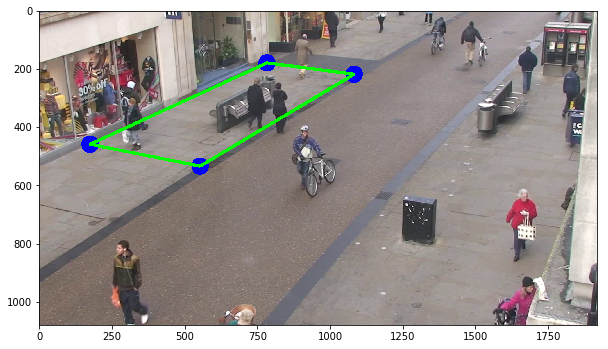

In [4]:
# Se importa el video 
video = cv2.VideoCapture('../Data/calle.avi')
# Se obtiene el primer frame
s,image = video.read() 
# Se almacena la imagen para poder obtener los puntos de transformacion
# cv2.imwrite('../Data/image.png',image) 
# Estos puntos de referencia fueron obtenidos con la ayuda de la herramienta sobre la acera que tiene remarcada las lozas:
# https://yangcha.github.io/iview/iview.html
puntos = np.float32([[175, 458],[784,178],[1084, 217], [554,533]])
# Se copia la imagen y se remarcan los puntos
imgDibujo = image.copy()
for i in range(0, 4):
  cv2.circle(imgDibujo, tuple(puntos[i]), 30, (255,0,0), -1)
# Se usa los puntos para obtener el poligono
pts = puntos.reshape((-1,1,2))
cv2.polylines(imgDibujo, [pts.astype(np.int32)], True, (0,255,0), thickness=10)
b,g,r = cv2.split(imgDibujo)
# Se muestra los puntos de referencia tomados en el frame
imgDibujo = cv2.merge((r,g,b))
plt.figure(figsize=(10,10))
plt.imshow(imgDibujo)
plt.show()

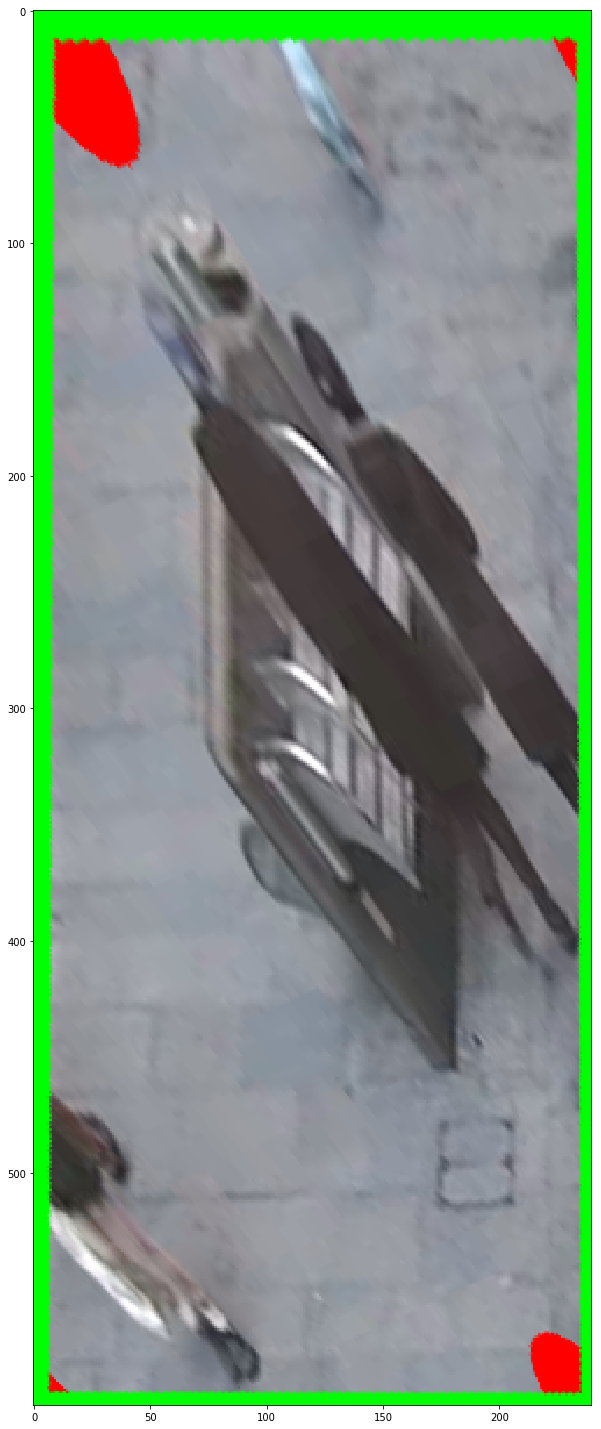

In [5]:
#6 lozas de ancho - Aproximamos ancho de 40 cm
#15 Lozas de alto - Aproximamos largo de 40 cm
width = 6*40
height = 15*40

# Hacemos la transformacion
target = np.float32([[0,height],[0,0],[width,0],[width,height]])
# Obtenemos la matriz de transformacion
matrix = cv2.getPerspectiveTransform(puntos, target)
# Aplicamos la transformacion en el dibujo 
b,g,r = cv2.split(imgDibujo)
imgDibujo = cv2.merge((r,g,b))
result = cv2.warpPerspective(imgDibujo, matrix, (width,height))
plt.figure(figsize=(10,30))
plt.imshow(result)
plt.show()

## Visualización de video con detección de personas

In [6]:
# Funcion para mostrar 20 primeros frames de video junto con las ventanas para la deteccion de personas y caras
def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    count = 0
    success = 1
    while success and count<20: 
        success, image = vidObj.read() 
        filter_df = df[df['Frame']==(count)]
        for index,row in filter_df.iterrows():
            start_point = (int(float(row['headLeft'].replace(',','.'))), int(float(row['headTop'].replace(',','.'))) )
            end_point = (int(float(row['headRight'].replace(',','.'))), int(float(row['headBottom'].replace(',','.')))) 
            color = (255, 0, 0) 
            thickness = 2
            image = cv2.rectangle(image, start_point, end_point, color, thickness) 
            start_point2 = (int(float(row['bodyLeft'].replace(',','.'))), int(float(row['bodyTop'].replace(',','.'))) )
            end_point2 = (int(float(row['bodyRight'].replace(',','.'))), int(float(row['bodyBottom'].replace(',','.')))) 
            color2 = (0, 255, 0) 
            image = cv2.rectangle(image, start_point2, end_point2, color2, thickness)
        b,g,r = cv2.split(image)
        frame_rgb = cv2.merge((r,g,b))
        plt.figure(figsize = (20,8))
        plt.subplot(121)
        plt.title('Original') 
        plt.imshow(frame_rgb)
        #plt.subplot(122)
        #plt.imshow(frame_rgb)
        #plt.title('Ojo de halcon') 
        plt.show()
        clear_output(wait=True)
        count += 1
    #Guarda el ultimo frame
    cv2.imwrite('../Resultados/out1.png',image) 

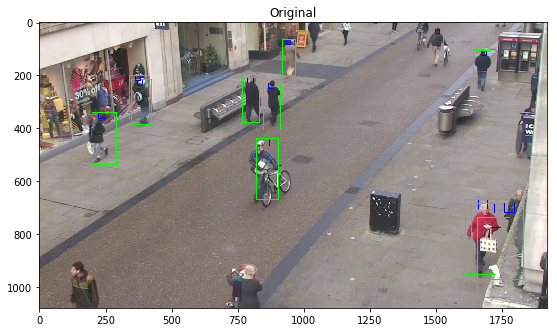

In [7]:
# Se aplica la funcion para visualizar 20 frames del video
FrameCapture('../Data/calle.avi')

### Conclusión:
- Hay que mostrar mejor los puntos y las perspectivas
- Hay que evaluar si usar la compilacion de las ventanas para personas y caras que estamos usando